In [ ]:
# Let's plot a Hyperbolic Decline Curve for a hypothetical unconventional reservoir.
# Assumption: Shale reservoir with an aggressive decline profile and high initial production rate.

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define parameters for the hyperbolic decline curve:
initial_rate = 1700  # Initial production rate in barrels per day
b = 0.5  # Hyperbolic decline exponent (controls how the decline rate changes over time)
d = 0.1  # Initial decline rate (rate of decline at the start of production)

# Time range for calculations (in years)
time = np.linspace(0, 10, 1000)  # Array of 1000 points from 0 to 10 years

In [ ]:
# Calculate production rates using the hyperbolic decline formula
production_rate = initial_rate / (1 + b * d * time)**(1/b)

# Calculate cumulative production over time
time_interval = time[1] - time[0]  # Time interval between each time point
cumulative_production = np.cumsum(production_rate) * time_interval  # Sum of production rates to get cumulative production

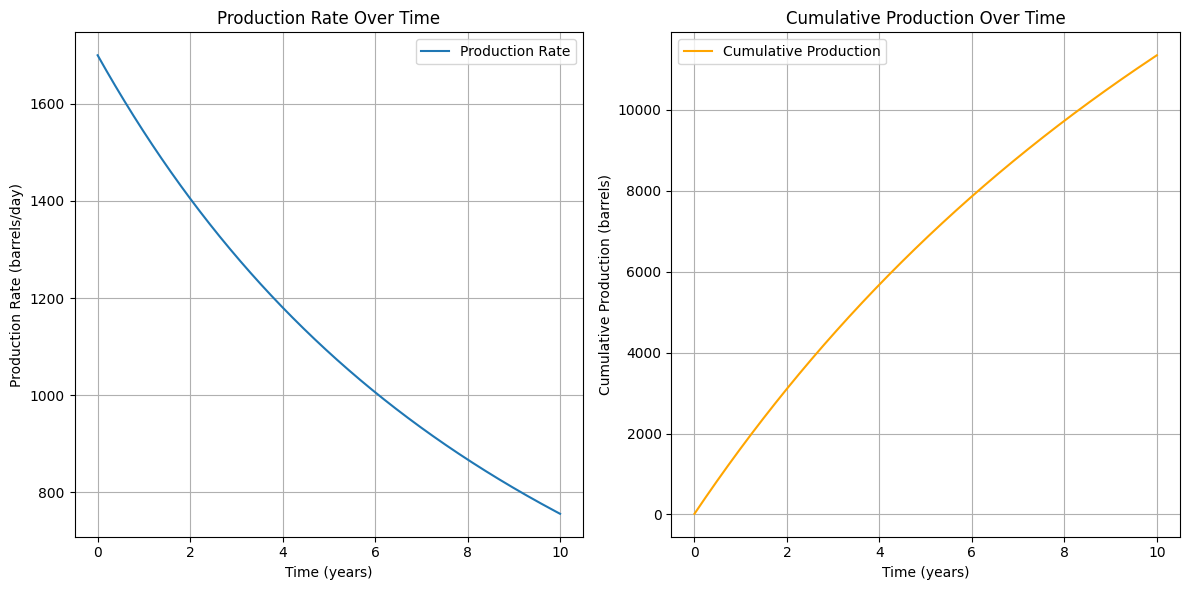

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))  # Figure size to contain 2 subplots

# Subplot no.1 : Production rate over time
plt.subplot(1, 2, 1)  # First subplot (Production rate vs time)
plt.plot(time, production_rate, label='Production Rate')  # Plot production rate vs. time
plt.title('Production Rate Over Time')  # Title for subplot
plt.xlabel('Time (years)')  # X-axis Label
plt.ylabel('Production Rate (barrels/day)')  # Y-axis Label
plt.grid(True)  # Add grid lines for better readability
plt.legend()  # Display legend

# Subplot no.2 : Cumulative production over time
plt.subplot(1, 2, 2)  # Second subplot (Cumulative production vs time)
plt.plot(time, cumulative_production, label='Cumulative Production', color='orange')  # Plot cumulative production vs. time
plt.title('Cumulative Production Over Time')  # Title for subplot
plt.xlabel('Time (years)')  # X-axis label
plt.ylabel('Cumulative Production (barrels)')  # Y-axis label
plt.grid(True)  # Add grid lines for better readability
plt.legend()  # Display legend

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()  # Display the plots

In [ ]:
# Sample Business Queries
# 1. What is the Estimated Ultimate Recovery (EUR) based on cumulative production

EUR = cumulative_production[-1]  # The last value in cumulative_production represents the EUR

print(f"Estimated Ultimate Recovery (EUR): {EUR:.2f} barrels")

Estimated Ultimate Recovery (EUR): 11345.62 barrels


In [ ]:
# 2. What is the estimated production rate for the first year, and what % of the EUR will it be?

# Sum of production in the first year
first_year_production = cumulative_production[time <= 1][-1]

# Percentage of EUR recovered in the first year
percentage_recovered = (first_year_production / EUR) * 100

print(f"Production in the first year: {first_year_production:.2f} barrels")
print(f"Percentage of EUR recovered in the first year: {percentage_recovered:.2f}%")

Production in the first year: 1621.38 barrels
Percentage of EUR recovered in the first year: 14.29%


In [ ]:
# 3. When will the cummulative production reach 50% of the Estimated Ultimate Recovery (EUR)

from scipy.optimize import fsolve

# Hyperbolic decline curve function
def decline_eq(b, q0, d, t):
    return q0 / (1 + b * d * t)**(1/b)

# Define parameters for the decline curve
b_solution = 0.5  # Hyperbolic decline exponent parameter
q_i = 1700  # Initial production rate in barrels per day
D_i = 0.1  # Initial decline rate parameter

# Define the time range for calculations (in years)
time = np.linspace(0, 10, 1000)  # Array of 1000 points from 0 to 10 years

# Calculate production rates using the hyperbolic decline formula
production_rate = decline_eq(b_solution, q_i, D_i, time)

# Calculate cumulative production over time
time_interval = time[1] - time[0]  # Time interval between each point
cumulative_production = np.cumsum(production_rate) * time_interval

# Estimate the Total EUR
EUR = cumulative_production[-1]  # The last value in cumulative production represents the EUR

# Function to solve for the time when cumulative production reaches a certain percentage of EUR
def time_to_reach_percentage(t, percentage):
    return np.interp(t, time, cumulative_production) - (percentage / 100 * EUR)

# Time (in years) when cumulative production reaches 50% of EUR
percentage_target = 50
initial_guess_time = 5  # Initial guess for the time in years

# Time (in years) when cumulative production reaches 50% of EUR
time_to_reach_50_percent_years = fsolve(time_to_reach_percentage, initial_guess_time, args=(percentage_target))[0]

print(f'Time when cumulative production reaches 50% of EUR: {time_to_reach_50_percent_years:.2f} years')

Time when cumulative production reaches 50% of EUR: 3.99 years


In [ ]:
# 4. When Will the Well's Production Fall Below 500 Barrels per Day?

# Redefine the function to solve for the time (in years) when production drops below a specific threshold
def time_to_produce_below_threshold(t, threshold):
    return initial_rate / (1 + b_adjusted * d_adjusted * t)**(1/b_adjusted) - threshold

# Assuming a drop in Reservoir pressure
b_adjusted = 0.7  # Increased 'b' for a steeper decline
d_adjusted = 0.2  # Adjusted 'd' (Set higher to reflect more decline)

# Known values
threshold_value = 500  # Threshold production rate in barrels/day
initial_guess_time = 10  # Initial guess for the time in years

# Time (in years) when production drops below the threshold value
time_to_fall_below_threshold_years = fsolve(time_to_produce_below_threshold, initial_guess_time, args=(threshold_value))[0]

print(f'Time when production falls below {threshold_value} barrels/day: {time_to_fall_below_threshold_years:.2f} years')

Time when production falls below 500 barrels/day: 9.68 years


In [ ]:
# 5. What will be the break-even price per barrel to cover the operator's working interest share in 3 years?

# Define a time range for 3 years (36 months) to calculate production
time_three_years = np.arange(0, 36, 1)  # Array of monthly time points from 0 to 35 months

# Calculate production for each month using the decline curve function
production_three_years = decline_eq(b_solution, q_i, D_i, time_three_years)

# Sum the production values to get total production over the 3-year period
total_production_three_years = np.sum(production_three_years)

# Total investment for the operator's working interest over 3 years (in dollars)
total_cost = 1000000  # Arbitrary cost value

# Calculate the price per barrel needed to cover the total cost and break even
price_per_barrel = total_cost / total_production_three_years

# Break-even price per barrel to cover the working interest share
print(f'Break-even price per barrel to cover the working interest share: ${price_per_barrel:.2f}')

Break-even price per barrel to cover the working interest share: $44.22


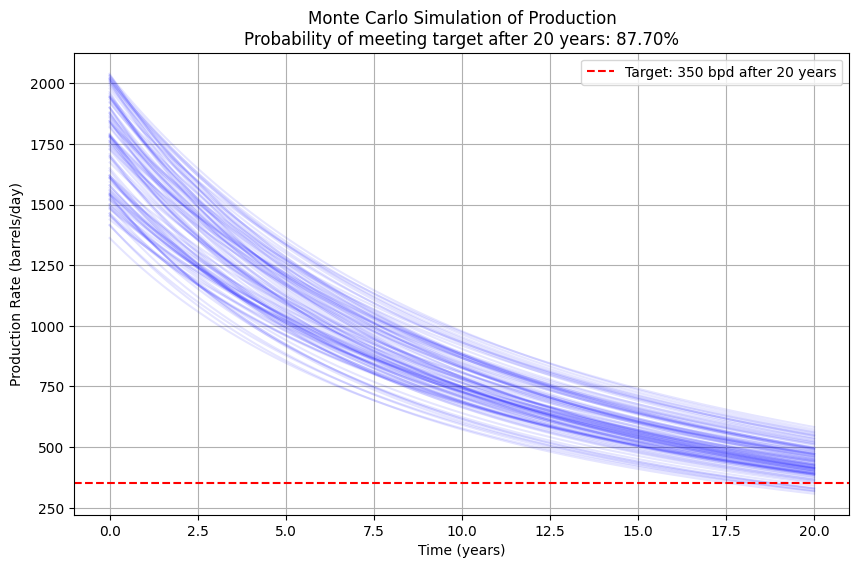

Probability of meeting or exceeding 350 bpd after 20 years: 87.70%


In [ ]:
# 6. What is the estimated probability that the well will sustain a production rate of at least 350 barrels per day over a 20-year period,
# given that production is projected to decline below 500 barrels per day after approximately 9.68 years?

# Target production rate bpd
target_production = 350

# Time range for calculations (up to 20 years)
time = np.linspace(0, 20, 1000)

# Number of Monte Carlo simulations to run
num_simulations = 1000

# Initialize array to store simulated production rates
simulated_production = np.zeros((num_simulations, len(time)))

# Initialize a list to track valid simulations
valid_simulations = []  # Empty list to store the production curves from simulations to meet criteria (Eg. Maintaining >500 bpd below 9.68 years)

# Run Monte Carlo simulations with increased variability
for i in range(num_simulations):
    # Add random variability in initial production and decline rate with ±20% variation
    initial_rate_sim = initial_rate * np.random.uniform(0.8, 1.2)
    d_sim = d * np.random.uniform(0.8, 1.2)

    # Calculate simulated production rate using the hyperbolic decline formula with random variability
    production_curve = initial_rate_sim / (1 + b * d_sim * time)**(1/b)
    simulated_production[i, :] = production_curve

    # Check if production falls below 500 bpd before 20 years
    if np.max(production_curve) >= 500:  # Ensuring production reached at least 500 bpd
        if production_curve[np.searchsorted(time, 9.68)] >= 500:  # Check time at 9.68 years
            valid_simulations.append(production_curve)

# Convert valid simulations to a NumPy array for easier processing
valid_simulations = np.array(valid_simulations)

# Calculate the probability of meeting or exceeding the target production rate at the end of the valid simulations (20 years)
if valid_simulations.size > 0:
    prob_meeting_target = np.mean(valid_simulations[:, -1] >= target_production) * 100
else:
    prob_meeting_target = 0  # No valid simulations

# Plot simulation results to visualize the spread
plt.figure(figsize=(10, 6))
for i in range(min(100, len(valid_simulations))):  # Plot of up to 100 valid simulations for clarity
    plt.plot(time, valid_simulations[i, :], color='blue', alpha=0.1)  # Plot with transparency to show overlap

# Add a horizontal line representing the target production rate
plt.axhline(y=target_production, color='red', linestyle='--', label=f'Target: {target_production} bpd after 20 years')
plt.title(f'Monte Carlo Simulation of Production\nProbability of meeting target after 20 years: {prob_meeting_target:.2f}%')
plt.xlabel('Time (years)')
plt.ylabel('Production Rate (barrels/day)')
plt.legend()
plt.grid(True)
plt.show()

# Probability output
print(f'Probability of meeting or exceeding {target_production} bpd after 20 years: {prob_meeting_target:.2f}%')